<a href="https://colab.research.google.com/github/naikasann/Echo_state_convnet_test/blob/main/EchostateCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESN test program

Echo state networkのテスト動作用のipynb


In [1]:
# for debug.
! nvidia-smi

Thu Nov 18 17:51:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# check tesorflow gpu
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


---

## pyplライブラリのインポート

In [3]:
# need tensorflow-addons(for Echo state Network)
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 11.9 MB/s 


In [4]:
# import python library
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Dense, Activation
from tensorflow_addons.layers import ESN
from tensorflow.python.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

---

## Cifar10データセットのロード


170500096/170498071 [==============================] - 6s 0us/step


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


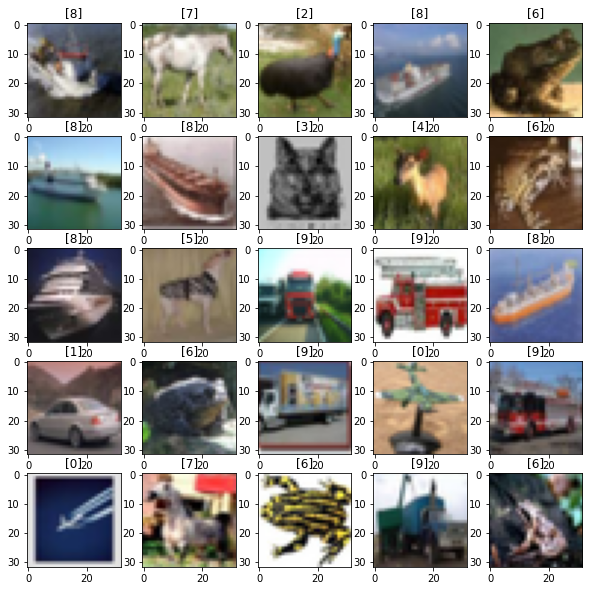

In [5]:
# load cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

# cifar10 dataset plot.
plt.figure(figsize=(10,10))
for i in range(25):
    rand_num=np.random.randint(0,50000)
    cifar_img=plt.subplot(5,5,i+1)
    plt.imshow(x_train[rand_num])
    plt.tick_params(labelbottom='off')
    plt.tick_params(labelleft='off')
    plt.title(y_train[rand_num])
plt.show()

# Normalize the image in the range 0-1
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

# Convert correct answer labels to One-Hot expressions
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

---
## モデルのロード

まずは通常のCNN畳み込みモデルをロードする。

In [6]:
# model load(CNN -> Dense)
model = Sequential([
     Conv2D(filters=32,input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
     Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
     MaxPool2D(pool_size=(2,2)),
     Dropout(0.25),
     Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
     Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
     MaxPool2D(pool_size=(2,2)),
     Dropout(0.25),
     Flatten(),
     Dense(512,activation='relu'),
     Dropout(0.5),
     Dense(units=10,activation='softmax')  
])
# model plot
model.summary()
# compile.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

### CNN -> Echo State Network の実装

In [7]:
# model load(CNN -> Echo state Network)
esn_model = Sequential([
     Conv2D(filters=32,input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
     Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
     MaxPool2D(pool_size=(2,2)),
     Dropout(0.25),
     Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
     Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
     MaxPool2D(pool_size=(2,2)),
     Dropout(0.25),
     Flatten(),
     Reshape((1, 4096)),
     ESN(10, connectivity=0.01, activation="softmax")
])
# model plot
esn_model.summary()
# compile
esn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

CNN -> ESN -> ESN(num classes) モデルの実装

In [8]:
esn_esn_model = Sequential([
     Conv2D(filters=32,input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
     Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
     MaxPool2D(pool_size=(2,2)),
     Dropout(0.25),
     Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
     Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
     MaxPool2D(pool_size=(2,2)),
     Dropout(0.25),
     Flatten(),
     Reshape((1, 4096)),
     ESN(256, connectivity=0.01, activation="relu"),
     Reshape((1, 256)),
     ESN(10, connectivity=0.01, activation="softmax")
])

esn_esn_model.summary()

esn_esn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

CNN -> ESN -> Dense(numclasses)モデルの実装

In [9]:
esn_dense_model = Sequential([
     Conv2D(filters=32,input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
     Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
     MaxPool2D(pool_size=(2,2)),
     Dropout(0.25),
     Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
     Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
     MaxPool2D(pool_size=(2,2)),
     Dropout(0.25),
     Flatten(),
     Reshape((1, 4096)),
     ESN(256, connectivity=0.01, activation="relu"),
     Dense(10, activation="softmax")
])

esn_dense_model.summary()

esn_dense_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

---

## 学習する

まずは通常のCNNから

In [10]:
history = model.fit(x_train, y_train, validation_split=0.25, epochs=10, batch_size=16, verbose=1)

Epoch 1/10
2344/2344 [==============================] - 65s 15ms/step - loss: 1.6206 - accuracy: 0.4031 - val_loss: 1.2424 - val_accuracy: 0.5544
Epoch 2/10
2344/2344 [==============================] - 34s 15ms/step - loss: 1.1914 - accuracy: 0.5750 - val_loss: 1.0439 - val_accuracy: 0.6305
Epoch 3/10
2344/2344 [==============================] - 34s 15ms/step - loss: 1.0345 - accuracy: 0.6358 - val_loss: 0.9305 - val_accuracy: 0.6751
Epoch 4/10
2344/2344 [==============================] - 34s 15ms/step - loss: 0.9353 - accuracy: 0.6698 - val_loss: 0.8536 - val_accuracy: 0.7026
Epoch 5/10
2344/2344 [==============================] - 32s 14ms/step - loss: 0.8746 - accuracy: 0.6910 - val_loss: 0.8662 - val_accuracy: 0.6980
Epoch 6/10
2344/2344 [==============================] - 33s 14ms/step - loss: 0.8207 - accuracy: 0.7129 - val_loss: 0.7855 - val_accuracy: 0.7275
Epoch 7/10
2344/2344 [==============================] - 34s 14ms/step - loss: 0.7789 - accuracy: 0.7247 - val_loss: 0.7578 -

学習結果をプロットする

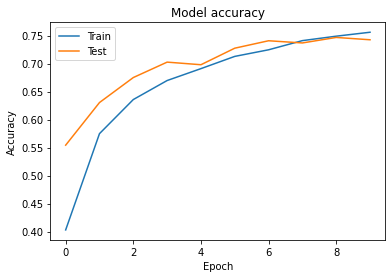

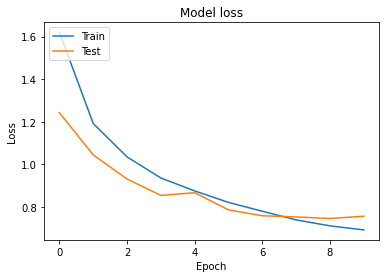

In [11]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

CNN -> ESNの学習

In [12]:
esn_history = esn_model.fit(x_train, y_train, validation_split=0.25, epochs=10, batch_size=16, verbose=1)

Epoch 1/10
2344/2344 [==============================] - 36s 15ms/step - loss: 1.8010 - accuracy: 0.3403 - val_loss: 1.4653 - val_accuracy: 0.4825
Epoch 2/10
2344/2344 [==============================] - 34s 14ms/step - loss: 1.4790 - accuracy: 0.4743 - val_loss: 1.3164 - val_accuracy: 0.5377
Epoch 3/10
2344/2344 [==============================] - 32s 14ms/step - loss: 1.3429 - accuracy: 0.5235 - val_loss: 1.2084 - val_accuracy: 0.5826
Epoch 4/10
2344/2344 [==============================] - 32s 14ms/step - loss: 1.2473 - accuracy: 0.5591 - val_loss: 1.1683 - val_accuracy: 0.5943
Epoch 5/10
2344/2344 [==============================] - 32s 14ms/step - loss: 1.1915 - accuracy: 0.5811 - val_loss: 1.1029 - val_accuracy: 0.6087
Epoch 6/10
2344/2344 [==============================] - 34s 15ms/step - loss: 1.1409 - accuracy: 0.5958 - val_loss: 1.0495 - val_accuracy: 0.6366
Epoch 7/10
2344/2344 [==============================] - 34s 15ms/step - loss: 1.0929 - accuracy: 0.6174 - val_loss: 1.0155 -

学習結果のプロット

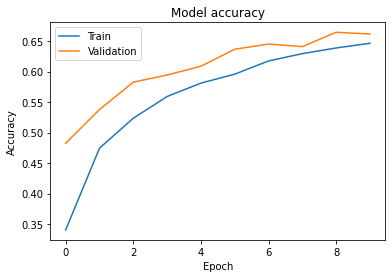

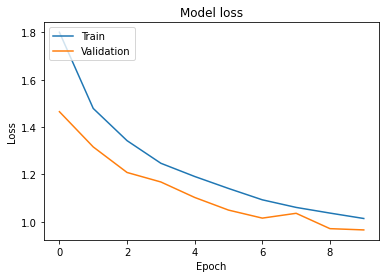

In [13]:
# Plot training & validation accuracy values
plt.plot(esn_history.history['accuracy'])
plt.plot(esn_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(esn_history.history['loss'])
plt.plot(esn_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

CNN -> ESN -> ESN(num classes) モデルの学習

In [14]:
esn_esn_history = esn_esn_model.fit(x_train, y_train, validation_split=0.25, epochs=10, batch_size=16, verbose=1)

Epoch 1/10
2344/2344 [==============================] - 44s 18ms/step - loss: 1.8654 - accuracy: 0.3178 - val_loss: 1.5474 - val_accuracy: 0.4536
Epoch 2/10
2344/2344 [==============================] - 41s 17ms/step - loss: 1.5467 - accuracy: 0.4453 - val_loss: 1.3533 - val_accuracy: 0.5266
Epoch 3/10
2344/2344 [==============================] - 43s 18ms/step - loss: 1.4108 - accuracy: 0.4993 - val_loss: 1.2386 - val_accuracy: 0.5697
Epoch 4/10
2344/2344 [==============================] - 42s 18ms/step - loss: 1.3233 - accuracy: 0.5313 - val_loss: 1.1803 - val_accuracy: 0.5910
Epoch 5/10
2344/2344 [==============================] - 42s 18ms/step - loss: 1.2622 - accuracy: 0.5524 - val_loss: 1.1433 - val_accuracy: 0.6015
Epoch 6/10
2344/2344 [==============================] - 43s 18ms/step - loss: 1.2048 - accuracy: 0.5741 - val_loss: 1.1035 - val_accuracy: 0.6097
Epoch 7/10
2344/2344 [==============================] - 40s 17ms/step - loss: 1.1680 - accuracy: 0.5877 - val_loss: 1.0480 -

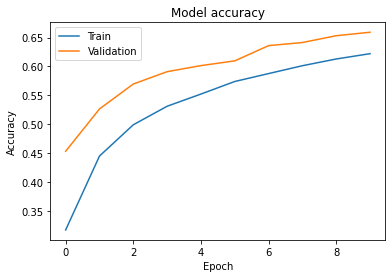

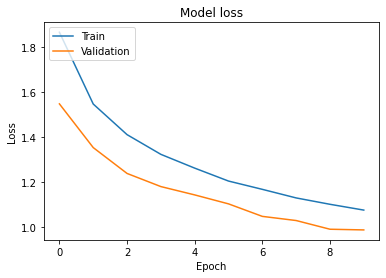

In [15]:
# Plot training & validation accuracy values
plt.plot(esn_esn_history.history['accuracy'])
plt.plot(esn_esn_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(esn_esn_history.history['loss'])
plt.plot(esn_esn_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

CNN -> ESN -> Dense(numclasses)モデルの学習

In [16]:
esn_dense_history = esn_dense_model.fit(x_train, y_train, validation_split=0.25, epochs=10, batch_size=16, verbose=1)

Epoch 1/10
2344/2344 [==============================] - 35s 14ms/step - loss: 1.7073 - accuracy: 0.3669 - val_loss: 1.4022 - val_accuracy: 0.5038
Epoch 2/10
2344/2344 [==============================] - 33s 14ms/step - loss: 1.3240 - accuracy: 0.5195 - val_loss: 1.1814 - val_accuracy: 0.5794
Epoch 3/10
2344/2344 [==============================] - 34s 15ms/step - loss: 1.1669 - accuracy: 0.5818 - val_loss: 1.0365 - val_accuracy: 0.6363
Epoch 4/10
2344/2344 [==============================] - 33s 14ms/step - loss: 1.0733 - accuracy: 0.6170 - val_loss: 1.0008 - val_accuracy: 0.6476
Epoch 5/10
2344/2344 [==============================] - 34s 15ms/step - loss: 1.0194 - accuracy: 0.6387 - val_loss: 0.9530 - val_accuracy: 0.6644
Epoch 6/10
2344/2344 [==============================] - 33s 14ms/step - loss: 0.9752 - accuracy: 0.6513 - val_loss: 0.8888 - val_accuracy: 0.6842
Epoch 7/10
2344/2344 [==============================] - 34s 15ms/step - loss: 0.9482 - accuracy: 0.6642 - val_loss: 0.8953 -

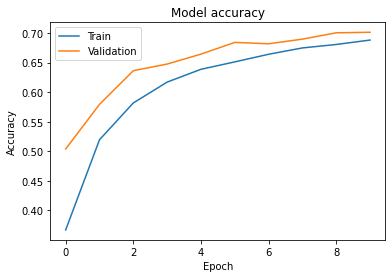

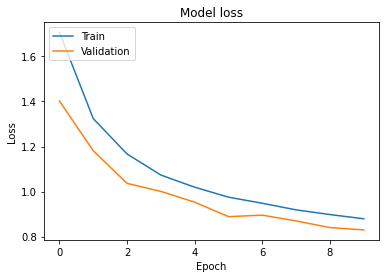

In [17]:
# Plot training & validation accuracy values
plt.plot(esn_dense_history.history['accuracy'])
plt.plot(esn_dense_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(esn_dense_history.history['loss'])
plt.plot(esn_dense_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

通常のCNNのテスト

In [18]:
loss, accuracy = model.evaluate(x_test,y_test)
print("loss : {} , accracuy : {}".format(loss, accuracy))

313/313 [==============================] - 2s 7ms/step - loss: 0.7706 - accuracy: 0.7400
loss : 0.7705838084220886 , accracuy : 0.7400000095367432


CNN -> ESNのテスト

In [19]:
loss, accuracy = esn_model.evaluate(x_test,y_test)
print("loss : {} , accracuy : {}".format(loss, accuracy))

313/313 [==============================] - 2s 6ms/step - loss: 0.9706 - accuracy: 0.6613
loss : 0.9706305861473083 , accracuy : 0.661300003528595


CNN -> ESN -> ESN(num classes) モデルのテスト

In [20]:
loss, accuracy = esn_esn_model.evaluate(x_test,y_test)
print("loss : {} , accracuy : {}".format(loss, accuracy))

313/313 [==============================] - 2s 7ms/step - loss: 0.9871 - accuracy: 0.6549
loss : 0.9870553612709045 , accracuy : 0.6549000144004822


CNN -> ESN -> Dense(numclasses)モデルのテスト

In [21]:
loss, accuracy = esn_dense_model.evaluate(x_test,y_test)
print("loss : {} , accracuy : {}".format(loss, accuracy))

313/313 [==============================] - 2s 7ms/step - loss: 0.8385 - accuracy: 0.7023
loss : 0.8385415077209473 , accracuy : 0.7023000121116638
